# Probing the Khan-Penrose colliding plane impulsive gravitational waves solution by Abbasi and Qadir
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 24, 2022

https://iopscience.iop.org/article/10.1088/2399-6528/aaaa7f/pdf

Above Paper References Paper Below

https://arxiv.org/pdf/gr-qc/0701066.pdf

https://arxiv.org/pdf/gr-qc/0701098.pdf

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [4]:
gamma = Function('gamma')(t,rho)
gamma

In [5]:
psi = Function('psi')(t,rho)
psi

In [6]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( exp(2*(gamma-psi))*(dt**2 - drho**2) - exp(-2*psi)*rho**2*dphi**2 - exp(2*psi)*dz**2 ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅ψ(t, ρ)             ⎥
⎢          0                        0             -ρ ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅ψ(t, ρ)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡ 2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅ψ(t, ρ)             ⎥
⎢          0                        0             -ρ ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅ψ(t, ρ)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, ρ)) - ──(ψ(t, ρ))  ──(γ(t, ρ)) - ──(ψ(t, ρ))               0                      
⎢⎢∂t            ∂t           ∂ρ            ∂ρ                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(t, ρ)) - ──(ψ(t, ρ))  ──(γ(t, ρ)) - ──(ψ(t, ρ))               0                      
⎢⎢∂ρ            ∂ρ           ∂t            ∂t                                               
⎢⎢                                                                                          
⎢⎢                                                        2  -2⋅γ(t, ρ) ∂                   
⎢⎢            0                          0              -ρ ⋅ℯ          ⋅──(ψ(t, ρ))         
⎢⎢                                                                    

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞           
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂       
⎢ρ⋅⎜───(γ(t, ρ)) - ───(γ(t, ρ)) - ───(ψ(t, ρ)) - 2⋅⎜──(ψ(t, ρ))⎟  + ───(ψ(t, ρ))⎟ + ──(γ(t, 
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ      
⎢  ⎝∂ρ             ∂t             ∂ρ                                ∂t          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                     ρ                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                               ∂     

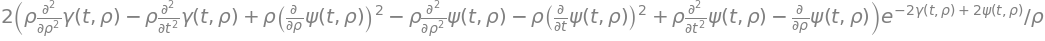

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞           
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂       
⎢ρ⋅⎜───(γ(t, ρ)) - ───(γ(t, ρ)) - ───(ψ(t, ρ)) - 2⋅⎜──(ψ(t, ρ))⎟  + ───(ψ(t, ρ))⎟ + ──(γ(t, 
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ      
⎢  ⎝∂ρ             ∂t             ∂ρ                                ∂t          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                     ρ                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛    2              2              2                           2     2         ⎞       
⎢    ⎜   ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂   
⎢- ρ⋅⎜- ───(γ(t, ρ)) + ───(γ(t, ρ)) + ───(ψ(t, ρ)) + 2⋅⎜──(ψ(t, ρ))⎟  - ───(ψ(t, ρ))⎟ + ──(γ
⎢    ⎜    2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ  
⎢    ⎝  ∂ρ             ∂t             ∂ρ                                ∂t          ⎠       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                       ρ                                   
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                 ∂   

In [22]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                        ∂                                               ∂  
⎢               2                2   1.0⋅──(γ(t, ρ))                                     ──(
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂ρ                    ∂           ∂             ∂t 
⎢- ⎜──(ψ(t, ρ))⎟  - ⎜──(ψ(t, ρ))⎟  + ───────────────       - 2⋅──(ψ(t, ρ))⋅──(ψ(t, ρ)) + ───
⎢  ⎝∂ρ         ⎠    ⎝∂t         ⎠           ρ                  ∂ρ          ∂t               
⎢                                                                                           
⎢                                   ∂                                                       
⎢                                   ──(γ(t, ρ))                      2                2   1.
⎢         ∂           ∂             ∂t                  ⎛∂          ⎞    ⎛∂          ⎞      
⎢     - 2⋅──(ψ(t, ρ))⋅──(ψ(t, ρ)) + ───────────       - ⎜──(ψ(t, ρ))⎟  - ⎜──(ψ(t, ρ))⎟  + ──
⎢         ∂ρ          ∂t                 ρ              ⎝∂ρ         ⎠ 

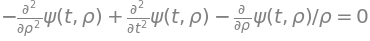

In [32]:
equation8a = Eq(expand((1/rho)*ricciSimplified[3,3].args[1]),0)
equation8a

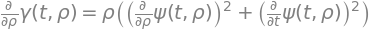

In [34]:
equation8b = Eq(diff(gamma,rho), solve( einsteinSimplified[0,0], diff(gamma,rho) )[0] ) 
equation8b

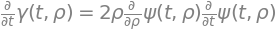

In [33]:
equation8c = Eq(diff(gamma,t),solve( einsteinSimplified[1,0], diff(gamma,t) )[0] ) 
equation8c 

In [36]:
vacuumFieldEquations = Matrix([equation8a,equation8b,equation8c])
vacuumFieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(t, ρ))     ⎥
⎢    ∂              ∂             ∂ρ              ⎥
⎢ - ───(ψ(t, ρ)) + ───(ψ(t, ρ)) - ─────────── = 0 ⎥
⎢     2              2                 ρ          ⎥
⎢   ∂ρ             ∂t                             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(t, ρ)) = ρ⋅⎜⎜──(ψ(t, ρ))⎟  + ⎜──(ψ(t, ρ))⎟ ⎟⎥
⎢∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂t         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(t, ρ)) = 2⋅ρ⋅──(ψ(t, ρ))⋅──(ψ(t, ρ))    ⎥
⎣    ∂t                ∂ρ          ∂t             ⎦

In [37]:
X, Y = map(Function, 'XY')

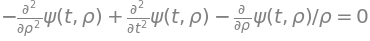

In [38]:
eq = vacuumFieldEquations[0]
eq

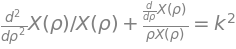

In [46]:
xODE = Eq(pde_separate( eq, psi, [X(rho),Y(t)])[0] , k**2 ) 
xODE

In [47]:
xSolution = dsolve( xODE , X(rho))
xSolution 

In [48]:
#  Here we arbitrarily set the constants of integration equal to one... fix this later 
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

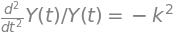

In [49]:
yODE = Eq( pde_separate( eq, psi, [X(rho),Y(t)])[1] , - k**2 ) 
yODE

In [50]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [52]:
#  Here we arbitrarily set the constants of integration equal to one... fix this later 
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

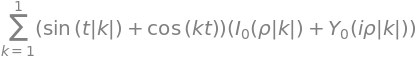

In [54]:
#  arbitrarily keeping just one term... fix this later
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) )

In [56]:
psiSolution = Eq(psi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,1) ).doit() ) 
psiSolution

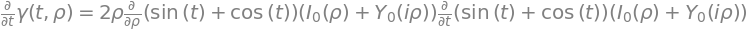

In [57]:
dgammadt = vacuumFieldEquations[2].subs(psiSolution.lhs,psiSolution.rhs)
dgammadt

In [58]:
dgammadt.doit()

In [62]:
integrateGammaWRTt = pdsolve( dgammadt.doit() )
integrateGammaWRTt

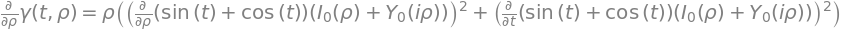

In [60]:
dgammarho = vacuumFieldEquations[1].subs(psiSolution.lhs,psiSolution.rhs)
dgammarho

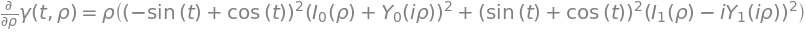

In [61]:
dgammarho.doit()

In [63]:
#  Prepare to wait.... this takes a while to evaluate even for just the one term solution 
integrateGammaWRTrho = pdsolve(dgammarho.doit())
integrateGammaWRTrho